In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install --upgrade tensorflow

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import DepthwiseConv2D


class CustomDepthwiseConv2D(DepthwiseConv2D):
    def __init__(self, *args, **kwargs):

        kwargs.pop('groups', None)
        super().__init__(*args, **kwargs)


model = tf.keras.models.load_model(
    '/content/my_model_eff2 (10).h5',
    custom_objects={'DepthwiseConv2D': CustomDepthwiseConv2D}
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


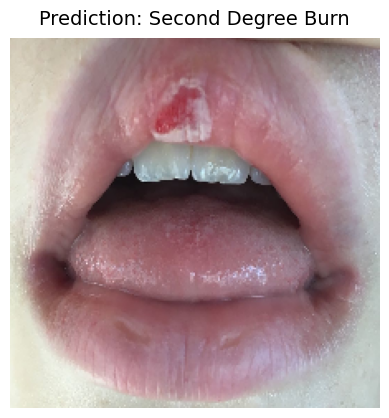

Image: img950.jpg
Prediction: Second Degree Burn


In [51]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/img950.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to match the model's input size
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
img_array = preprocess_input(img_array)  # Preprocess the image for EfficientNet

# Make predictions using the model
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions[0])  # Find the index of the highest confidence score

# Class names
class_names = ['First Degree Burn', 'Second Degree Burn', 'Third Degree Burn']

# Display the image with the prediction
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.title(f"Prediction: {class_names[predicted_class]}", fontsize=14, pad=10)  # Add a title with the prediction
plt.show()

# Print the result
print(f"Image: {img_path.split('/')[-1]}")  # Print the image file name
print(f"Prediction: {class_names[predicted_class]}")  # Print the predicted class